In [26]:
import matplotlib.pyplot as plot
import csv
import numpy as np
import random

In [27]:
# add lables for all data -- For Prof. Hossfeld's lecture only
import os
# label = [timestamp_UNIX, timestamp, pod_number, power, CPU, GPU, Mem, NETpacket, task]
directory = '../data'
for filename in os.listdir(directory):
    if filename.endswith('12_6_2023_10h37.csv'):
        file_path = os.path.join(directory, filename)
        
        # Read the existing CSV file
        with open(file_path, 'r') as file:
            reader = csv.reader(file)
            rows = list(reader)
        
        # Add labels to the first row of the CSV file
        labels = ['timestamp_UNIX', 'timestamp', 'pod_number', 'power', 'CPU', 'GPU', 'Mem', 'NETpacket','repeat','task']  # Modify this list with your actual labels
        
        rows.insert(0, labels)
        
        # Write the updated CSV file
        with open(file_path, 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerows(rows)


In [28]:
average_ram_null_state = []
average_cpu_null_state = []
average_gpu_null_state = []
average_power_null_state = []

average_ram_warm_disk_state = []
average_cpu_warm_disk_state = []
average_gpu_warm_disk_state = []
average_power_warm_disk_state = []

average_ram_warm_cpu_state = []
average_cpu_warm_cpu_state = []
average_gpu_warm_cpu_state = []
average_power_warm_cpu_state = []

average_ram_warm_mem_state = []
average_cpu_warm_mem_state = []
average_gpu_warm_mem_state = []
average_power_warm_mem_state = []

average_ram_active_state = []
average_cpu_active_state = []
average_gpu_active_state = []
average_power_active_state = []

average_ram_cold_state = []
average_cpu_cold_state = []
average_gpu_cold_state = []
average_power_cold_state = []

average_ram_null_to_cold_process = []
average_cpu_null_to_cold_process = []
average_power_null_to_cold_process = []
average_bw_null_to_cold_process = []

average_ram_warm_disk_to_warm_cpu_process = []
average_cpu_warm_disk_to_warm_cpu_process = []
average_power_warm_disk_to_warm_cpu_process = []
average_bw_warm_disk_to_warm_cpu_process = []

average_ram_warm_cpu_to_warm_disk_process = []
average_cpu_warm_cpu_to_warm_disk_process = []
average_power_warm_cpu_to_warm_disk_process = []
average_bw_warm_cpu_to_warm_disk_process = []

average_ram_warm_mem_to_warm_disk_process = []
average_cpu_warm_mem_to_warm_disk_process = []
average_power_warm_mem_to_warm_disk_process = []
average_bw_warm_mem_to_warm_disk_process = []


average_ram_cold_to_warm_disk_process = []
average_cpu_cold_to_warm_disk_process = []
average_power_cold_to_warm_disk_process = []
average_bw_cold_to_warm_disk_process = []

average_power_active_to_warm_disk_process = []
average_cpu_active_to_warm_disk_process = []
average_ram_active_to_warm_disk_process = []
average_bw_active_to_warm_disk_process = []

average_power_warm_disk_to_cold_process = []
average_cpu_warm_disk_to_cold_process = []
average_ram_warm_disk_to_cold_process = []
average_bw_warm_disk_to_cold_process = []

average_power_cold_to_null_process = []
average_cpu_cold_to_null_process = []
average_ram_cold_to_null_process = []
average_bw_cold_to_null_process = []

In [29]:
for i in range(1,2):
    file_name = "../data/target_pod_1_repeat_"+str(i)+"_mec_12_6_2023_10h37.csv"
    #STATES
    ram_null_state = []
    cpu_null_state = []
    gpu_null_state = []
    power_null_state = []

    ram_warm_disk_state = []
    cpu_warm_disk_state = []
    gpu_warm_disk_state = []
    power_warm_disk_state = []

    ram_warm_cpu_state = []
    cpu_warm_cpu_state = []
    gpu_warm_cpu_state = []
    power_warm_cpu_state = []

    ram_active_state = []
    cpu_active_state = []
    gpu_active_state = []
    power_active_state = []

    ram_cold_state = []
    cpu_cold_state = []
    gpu_cold_state = []
    power_cold_state = []

    #PROCESS
    power_null_to_cold_process = []
    cpu_null_to_cold_process = []
    ram_null_to_cold_process = []
    bw_null_to_cold_process = []

    power_warm_disk_to_warm_cpu_process = []
    cpu_warm_disk_to_warm_cpu_process = []
    ram_warm_disk_to_warm_cpu_process = []
    bw_warm_disk_to_warm_cpu_process = []

    power_warm_cpu_to_warm_disk_process = []
    cpu_warm_cpu_to_warm_disk_process = []
    ram_warm_cpu_to_warm_disk_process = []
    bw_warm_cpu_to_warm_disk_process = []


    power_cold_to_warm_disk_process = []
    cpu_cold_to_warm_disk_process = []
    ram_cold_to_warm_disk_process = []
    bw_cold_to_warm_disk_process = []

    power_active_to_warm_disk_process = []
    cpu_active_to_warm_disk_process = []
    ram_active_to_warm_disk_process = []
    bw_active_to_warm_disk_process = []

    power_warm_disk_to_cold_process = []
    cpu_warm_disk_to_cold_process = []
    ram_warm_disk_to_cold_process = []
    bw_warm_disk_to_cold_process = []

    power_cold_to_null_process = []
    cpu_cold_to_null_process = []
    ram_cold_to_null_process = []
    bw_cold_to_null_process = []

    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            if row[8] == "null_state":
                power_null_state.append(float(row[3]))
                cpu_null_state.append(float(row[4]))
                gpu_null_state.append(float(row[5]))
                ram_null_state.append(float(row[6]))
            elif row[8] == "warm_disk_state":
                power_warm_disk_state.append(float(row[3]))
                cpu_warm_disk_state.append(float(row[4]))
                gpu_warm_disk_state.append(float(row[5]))
                ram_warm_disk_state.append(float(row[6]))
            elif row[8] == "warm_cpu_state":
                power_warm_cpu_state.append(float(row[3]))
                cpu_warm_cpu_state.append(float(row[4]))
                gpu_warm_cpu_state.append(float(row[5]))
                ram_warm_cpu_state.append(float(row[6]))
            elif row[8] == "active_state":
                power_active_state.append(float(row[3]))
                cpu_active_state.append(float(row[4]))
                gpu_active_state.append(float(row[5]))
                ram_active_state.append(float(row[6]))
            elif row[8] == "cold_state":
                power_cold_state.append(float(row[3]))
                cpu_cold_state.append(float(row[4]))
                gpu_cold_state.append(float(row[5]))
                ram_cold_state.append(float(row[6]))
            elif row[8] == "null_to_cold_process":
                power_null_to_cold_process.append(float(row[3]))
                cpu_null_to_cold_process.append(float(row[4]))
                ram_null_to_cold_process.append(float(row[6]))
                # bw_null_to_cold_process.append(float(row[7]))
            elif row[8] == "warm_disk_to_warm_cpu_process":
                power_warm_disk_to_warm_cpu_process.append(float(row[3]))
                cpu_warm_disk_to_warm_cpu_process.append(float(row[4]))
                ram_warm_disk_to_warm_cpu_process.append(float(row[6]))
                # bw_warm_disk_to_warm_cpu_process.append(float(row[7]))
            elif row[8] == "warm_cpu_to_warm_disk_process":
                power_warm_cpu_to_warm_disk_process.append(float(row[3]))
                cpu_warm_cpu_to_warm_disk_process.append(float(row[4]))
                ram_warm_cpu_to_warm_disk_process.append(float(row[6]))
                # bw_warm_cpu_to_warm_disk_process.append(float(row[7]))
                #NOTE: self_generated
                power_active_to_warm_disk_process.append(float(row[3]))
                cpu_active_to_warm_disk_process.append(float(row[4]))
                ram_active_to_warm_disk_process.append(float(row[6]))
                # bw_active_to_warm_disk_process.append(float(row[7]))
            elif row[8] == "cold_to_warm_disk_process":
                power_cold_to_warm_disk_process.append(float(row[3]))
                cpu_cold_to_warm_disk_process.append(float(row[4]))
                ram_cold_to_warm_disk_process.append(float(row[6]))
                bw_cold_to_warm_disk_process.append(float(row[7]))
            elif row[8] == "active_to_warm_disk_process":
                pass
                # power_active_to_warm_disk_process.append(float(row[3]))
                # cpu_active_to_warm_disk_process.append(float(row[4]))
                # ram_active_to_warm_disk_process.append(float(row[6]))
                # bw_active_to_warm_disk_process.append(float(row[7]))
            elif row[8] == "warm_disk_to_cold_process":
                power_warm_disk_to_cold_process.append(float(row[3]))
                cpu_warm_disk_to_cold_process.append(float(row[4]))
                ram_warm_disk_to_cold_process.append(float(row[6]))
                # bw_warm_disk_to_cold_process.append(float(row[7]))
            elif row[8] == "cold_to_null_process":
                power_cold_to_null_process.append(float(row[3]))
                cpu_cold_to_null_process.append(float(row[4]))
                ram_cold_to_null_process.append(float(row[6]))
                # bw_cold_to_null_process.append(float(row[7]))

        #STATES
        average_cpu_null_state.append(np.mean(cpu_null_state))
        average_gpu_null_state.append(np.mean(gpu_null_state))
        average_ram_null_state.append(np.mean(ram_null_state))
        average_power_null_state.append(np.mean(power_null_state))

        average_cpu_warm_disk_state.append(np.mean(cpu_warm_disk_state))
        average_gpu_warm_disk_state.append(np.mean(gpu_warm_disk_state))
        average_ram_warm_disk_state.append(np.mean(ram_warm_disk_state))
        average_power_warm_disk_state.append(np.mean(power_warm_disk_state))

        average_cpu_warm_cpu_state.append(np.mean(cpu_warm_cpu_state))
        average_gpu_warm_cpu_state.append(np.mean(gpu_warm_cpu_state))
        average_ram_warm_cpu_state.append(np.mean(ram_warm_cpu_state))
        average_power_warm_cpu_state.append(np.mean(power_warm_cpu_state))

        average_cpu_active_state.append(np.mean(cpu_active_state))
        average_gpu_active_state.append(np.mean(gpu_active_state))
        average_ram_active_state.append(np.mean(ram_active_state))
        average_power_active_state.append(np.mean(power_active_state))

        average_cpu_cold_state.append(np.mean(cpu_cold_state))
        average_gpu_cold_state.append(np.mean(gpu_cold_state))
        average_ram_cold_state.append(np.mean(ram_cold_state))
        average_power_cold_state.append(np.mean(power_cold_state))

        #PROCESS
        average_cpu_null_to_cold_process.append(np.mean(cpu_null_to_cold_process))
        average_ram_null_to_cold_process.append(np.mean(ram_null_to_cold_process))
        average_power_null_to_cold_process.append(np.mean(power_null_to_cold_process))
        # average_bw_null_to_cold_process.append((bw_null_to_cold_process[-1]-bw_null_to_cold_process[0])/(1024**2))

        average_cpu_warm_disk_to_warm_cpu_process.append(np.mean(cpu_warm_disk_to_warm_cpu_process))
        average_ram_warm_disk_to_warm_cpu_process.append(np.mean(ram_warm_disk_to_warm_cpu_process))
        average_power_warm_disk_to_warm_cpu_process.append(np.mean(power_warm_disk_to_warm_cpu_process))
        # average_bw_warm_disk_to_warm_cpu_process.append((bw_warm_disk_to_warm_cpu_process[-1]-bw_warm_disk_to_warm_cpu_process[0])/(1024**2))

        average_cpu_warm_cpu_to_warm_disk_process.append(np.mean(cpu_warm_cpu_to_warm_disk_process))
        average_ram_warm_cpu_to_warm_disk_process.append(np.mean(ram_warm_cpu_to_warm_disk_process))
        average_power_warm_cpu_to_warm_disk_process.append(np.mean(power_warm_cpu_to_warm_disk_process))
        # average_bw_warm_cpu_to_warm_disk_process.append((bw_warm_cpu_to_warm_disk_process[-1]-bw_warm_cpu_to_warm_disk_process[0])/(1024**2))

        average_cpu_cold_to_warm_disk_process.append(np.mean(cpu_cold_to_warm_disk_process))
        average_ram_cold_to_warm_disk_process.append(np.mean(ram_cold_to_warm_disk_process))
        average_power_cold_to_warm_disk_process.append(np.mean(power_cold_to_warm_disk_process))
        average_bw_cold_to_warm_disk_process.append((bw_cold_to_warm_disk_process[-1]-bw_cold_to_warm_disk_process[0])/(1024**2)) #Bandwidth = packet_after - packet_before

        average_cpu_active_to_warm_disk_process.append(np.mean(cpu_active_to_warm_disk_process))
        average_ram_active_to_warm_disk_process.append(np.mean(ram_active_to_warm_disk_process))
        ## NOTE: self_generated 
        average_power_active_to_warm_disk_process.append(np.mean(power_active_to_warm_disk_process)) 
        # average_bw_active_to_warm_disk_process.append((bw_active_to_warm_disk_process[-1]-bw_active_to_warm_disk_process[0])/(1024**2))

        average_cpu_warm_disk_to_cold_process.append(np.mean(cpu_warm_disk_to_cold_process))
        average_ram_warm_disk_to_cold_process.append(np.mean(ram_warm_disk_to_cold_process))
        average_power_warm_disk_to_cold_process.append(np.mean(power_warm_disk_to_cold_process))
        # average_bw_warm_disk_to_cold_process.append((bw_warm_disk_to_cold_process[-1]-bw_warm_disk_to_cold_process[0])/(1024**2))

        average_cpu_cold_to_null_process.append(np.mean(cpu_cold_to_null_process))
        average_ram_cold_to_null_process.append(np.mean(ram_cold_to_null_process))
        average_power_cold_to_null_process.append(np.mean(power_cold_to_null_process))
        # average_bw_cold_to_null_process.append((bw_cold_to_null_process[-1]-bw_cold_to_null_process[0])/(1024**2))

In [30]:
for i in range(1,2):
    file_name = "../data/target_pod_1_repeat_"+str(i)+"_mec_12_6_2023_10h37.csv"
    #STATES

    ram_warm_mem_state = []
    cpu_warm_mem_state = []
    gpu_warm_mem_state = []
    power_warm_mem_state = []

    power_warm_mem_to_warm_disk_process = []
    cpu_warm_mem_to_warm_disk_process = []
    ram_warm_mem_to_warm_disk_process = []
    # bw_warm_mem_to_warm_disk_process = []

    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            if row[8] == "warm_mem_state":
                power_warm_mem_state.append(float(row[3]))
                cpu_warm_mem_state.append(float(row[4]))
                gpu_warm_mem_state.append(float(row[5]))
                ram_warm_mem_state.append(float(row[6]))
            elif row[8] == "warm_mem_to_warm_disk_process":
                pass
                power_warm_mem_to_warm_disk_process.append(float(row[3]))
                cpu_warm_mem_to_warm_disk_process.append(float(row[4]))
                ram_warm_mem_to_warm_disk_process.append(float(row[6]))
                # bw_warm_mem_to_warm_disk_process.append(float(row[7]))

        #STATES
        average_cpu_warm_mem_state.append(np.mean(cpu_warm_mem_state))
        average_gpu_warm_mem_state.append(np.mean(gpu_warm_mem_state))
        average_ram_warm_mem_state.append(np.mean(ram_warm_mem_state))
        average_power_warm_mem_state.append(np.mean(power_warm_mem_state))


        #PROCESS
        
        average_cpu_warm_mem_to_warm_disk_process.append(np.mean(cpu_warm_mem_to_warm_disk_process))
        average_ram_warm_mem_to_warm_disk_process.append(np.mean(ram_warm_mem_to_warm_disk_process))
        average_power_warm_mem_to_warm_disk_process.append(np.mean(power_warm_mem_to_warm_disk_process))
        # average_bw_warm_mem_to_warm_disk_process.append((bw_warm_mem_to_warm_disk_process[-1]-bw_warm_mem_to_warm_disk_process[0])/(1024**2))

c:\Users\Minh Chau\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Minh Chau\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [31]:
#STATES
# Calculate the average
ram_null_state_mean = np.mean(average_ram_null_state)
cpu_null_state_mean = np.mean(average_cpu_null_state) 
gpu_null_state_mean = np.mean(average_gpu_null_state)
power_null_state_mean = np.mean(average_power_null_state)

ram_warm_mem_state_mean = np.mean(average_ram_warm_mem_state)
cpu_warm_mem_state_mean = np.mean(average_cpu_warm_mem_state)
gpu_warm_mem_state_mean = np.mean(average_gpu_warm_mem_state)
power_warm_mem_state_mean = np.mean(average_power_warm_mem_state) 

ram_warm_disk_state_mean = np.mean(average_ram_warm_disk_state)
cpu_warm_disk_state_mean = np.mean(average_cpu_warm_disk_state) 
gpu_warm_disk_state_mean = np.mean(average_gpu_warm_disk_state)
power_warm_disk_state_mean = np.mean(average_power_warm_disk_state)

ram_warm_cpu_state_mean = np.mean(average_ram_warm_cpu_state) 
cpu_warm_cpu_state_mean = np.mean(average_cpu_warm_cpu_state)
gpu_warm_cpu_state_mean = np.mean(average_gpu_warm_cpu_state)
power_warm_cpu_state_mean = np.mean(average_power_warm_cpu_state)

ram_active_state_mean = np.mean(average_ram_active_state)
cpu_active_state_mean = np.mean(average_cpu_active_state)
gpu_active_state_mean = np.mean(average_gpu_active_state)
power_active_state_mean = np.mean(average_power_active_state)

ram_cold_state_mean = np.mean(average_ram_cold_state)
cpu_cold_state_mean = np.mean(average_cpu_cold_state)
gpu_cold_state_mean = np.mean(average_gpu_cold_state)
power_cold_state_mean = np.mean(average_power_cold_state)

# Calculate the standard deviation
ram_null_state_std = np.std(average_ram_null_state) 
cpu_null_state_std = np.std(average_cpu_null_state) 
print(cpu_null_state_std)  
gpu_null_state_std = np.std(average_gpu_null_state)
power_null_state_std = np.std(average_power_null_state) 

ram_warm_mem_state_std = np.std(average_ram_warm_mem_state)
cpu_warm_mem_state_std = np.std(average_cpu_warm_mem_state)
gpu_warm_mem_state_std = np.std(average_gpu_warm_mem_state)
power_warm_mem_state_std = np.std(average_power_warm_mem_state)

ram_warm_disk_state_std = np.std(average_ram_warm_disk_state)
cpu_warm_disk_state_std = np.std(average_cpu_warm_disk_state)
gpu_warm_disk_state_std = np.std(average_gpu_warm_disk_state)
power_warm_disk_state_std = np.std(average_power_warm_disk_state)

ram_warm_cpu_state_std = np.std(average_ram_warm_cpu_state)
cpu_warm_cpu_state_std = np.std(average_cpu_warm_cpu_state)
gpu_warm_cpu_state_std = np.std(average_gpu_warm_cpu_state)
power_warm_cpu_state_std = np.std(average_power_warm_cpu_state)

ram_active_state_std = np.std(average_ram_active_state)
cpu_active_state_std = np.std(average_cpu_active_state)
gpu_active_state_std = np.std(average_gpu_active_state)
power_active_state_std = np.std(average_power_active_state)

ram_cold_state_std = np.std(average_ram_cold_state)
cpu_cold_state_std = np.std(average_cpu_cold_state)
gpu_cold_state_std = np.std(average_gpu_cold_state)
power_cold_state_std = np.std(average_power_cold_state)

0.0


C:\Users\Minh Chau\AppData\Local\Temp\ipykernel_8200\3149695276.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), rotation = 15)
C:\Users\Minh Chau\AppData\Local\Temp\ipykernel_8200\3149695276.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(state, fontsize = 12)


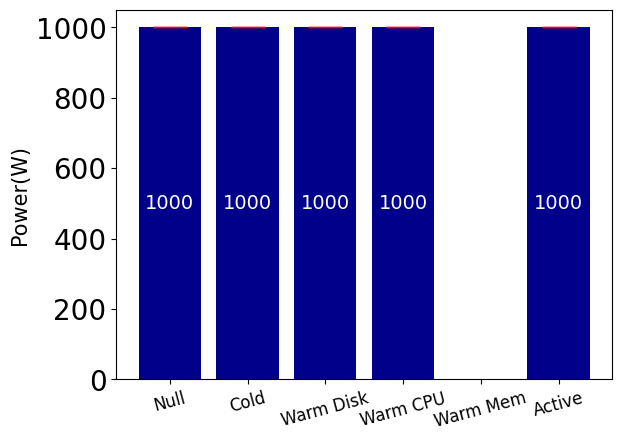

In [32]:
#Power in states
data = [power_null_state_mean, power_cold_state_mean,  power_warm_disk_state_mean, power_warm_cpu_state_mean,
        power_warm_mem_state_mean, power_active_state_mean]
error = [power_null_state_std, power_cold_state_std,  power_warm_disk_state_std, power_warm_cpu_state_std,
        power_warm_mem_state_std, power_active_state_std]
state = ["Null", "Cold", "Warm Disk", "Warm CPU", "Warm Mem", "Active"]
# state = ["$S_n$", "$S_c$", "$S_{wd}$", "$S_{wc}$", "$S_{wm}$",  "$S_a$"]
fig1, ax1 = plot.subplots()
x_pos = x_pos = np.arange(len(state))
ax1.bar(x_pos, data, yerr=error, align='center', alpha=0.9, ecolor='red', capsize=12)
# ax1.set_title('Average power usage of states')
data_round = [round(x, 2) for x in data]
bars= ax1.bar(state, data_round, color="darkblue")
ax1.bar_label(bars, label_type='center',color="w", fontsize = 14)
ax1.set_ylabel("Power(W)", fontsize = 15)
# ax1.set_xlabel("State ($S$)", fontsize = 15)
# ax1.set_xticks(rotation=15)
ax1.set_xticklabels(ax1.get_xticks(), rotation = 15)
# ax1.set_xticks(x_pos)
# ax1.set_yticks(fontsize = 13)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.set_xticklabels(state, fontsize = 12)
plot.savefig('../pdf/power-states.pdf', bbox_inches='tight')
plot.show()


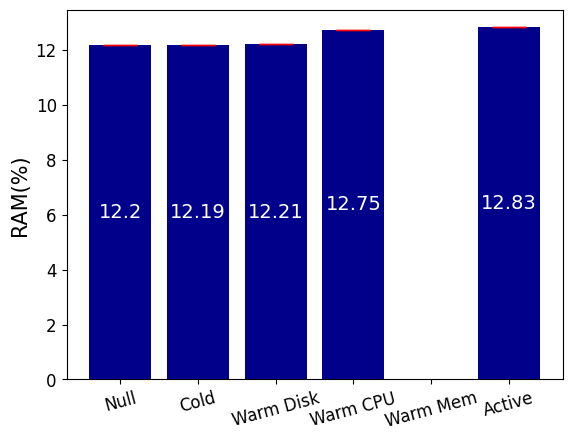

In [33]:
#RAM in states
data = [ram_null_state_mean, ram_cold_state_mean,  ram_warm_disk_state_mean, ram_warm_cpu_state_mean,
        ram_warm_mem_state_mean, ram_active_state_mean]
error = [ram_null_state_std, ram_cold_state_std,  ram_warm_disk_state_std, ram_warm_cpu_state_std,
        ram_warm_mem_state_std, ram_active_state_std]
# state = ["$S_n$", "$S_c$", "$S_{wd}$", "$S_{wc}$", "$S_{wm}$",  "$S_a$"]
state = ["Null", "Cold", "Warm Disk", "Warm CPU", "Warm Mem", "Active"]

fig1, ax1 = plot.subplots()
x_pos = x_pos = np.arange(len(state))
ax1.bar(x_pos, data, yerr=error, align='center', alpha=0.9, ecolor='red', capsize=12)
# ax1.set_title('RAM of states')
data_round = [round(x, 2) for x in data]
bars= ax1.bar(state, data_round, color="darkblue")
ax1.bar_label(bars, label_type='center',color="w", fontsize = 14)
ax1.set_ylabel("RAM(%)",  fontsize = 15)
# ax1.set_xlabel("State ($S$)",  fontsize = 15)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(state, rotation = 15)
# ax1.set_xticklabels(ax1.get_xticks(), )

ax1.tick_params(axis='both', which='major', labelsize=12)
# ax1.tick_params(axis='both', which='minor', labelsize=15)
plot.savefig('../pdf/RAM-states.pdf', bbox_inches='tight')
plot.show()


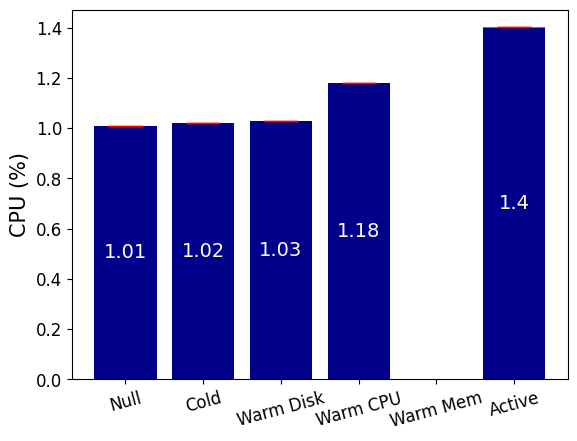

In [34]:
#CPU in states
data = [cpu_null_state_mean, cpu_cold_state_mean,  cpu_warm_disk_state_mean, cpu_warm_cpu_state_mean,
        cpu_warm_mem_state_mean, cpu_active_state_mean]
error = [cpu_null_state_std, cpu_cold_state_std,  cpu_warm_disk_state_std, cpu_warm_cpu_state_std,
        cpu_warm_mem_state_std, cpu_active_state_std]
# state = ["$S_n$", "$S_c$", "$S_{wd}$", "$S_{wc}$", "$S_{wm}$",  "$S_a$"]
state = ["Null", "Cold", "Warm Disk", "Warm CPU", "Warm Mem", "Active"]

fig1, ax1 = plot.subplots()
x_pos = x_pos = np.arange(len(state))
ax1.bar(x_pos, data, yerr=error, align='center', alpha=0.9, ecolor='red', capsize=12)
# ax1.set_title('CPU of states')
data_round = [round(x, 2) for x in data]
bars= ax1.bar(state, data_round, color="darkblue")
ax1.bar_label(bars, label_type='center',color="w", fontsize = 14)
# ax1.set_xlabel("State ($S$)",  fontsize = 15)
ax1.set_ylabel("CPU (%)",  fontsize = 15)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(state,  rotation = 15)
ax1.tick_params(axis='both', which='major', labelsize=12)
plot.savefig('../pdf/CPU-states.pdf', bbox_inches='tight')
plot.show()

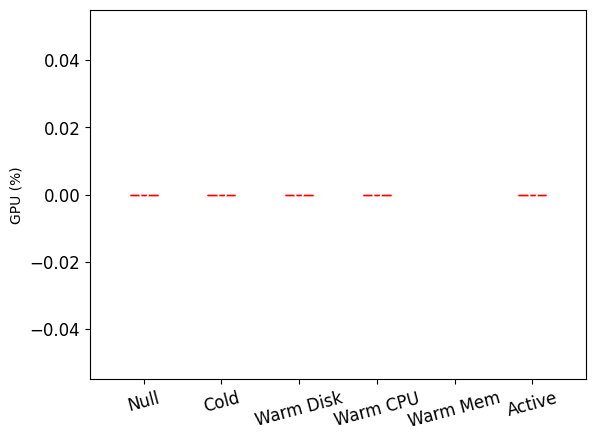

In [35]:
#GPU in states
data = [gpu_null_state_mean, gpu_cold_state_mean,  gpu_warm_disk_state_mean, gpu_warm_cpu_state_mean,
        gpu_warm_mem_state_mean, gpu_active_state_mean]
error = [gpu_null_state_std, gpu_cold_state_std,  gpu_warm_disk_state_std, gpu_warm_cpu_state_std,
        gpu_warm_mem_state_std, gpu_active_state_std]
# state = ["$S_n$", "$S_c$", "$S_{wd}$", "$S_{wc}$", "$S_{wm}$",  "$S_a$"]
state = ["Null", "Cold", "Warm Disk", "Warm CPU", "Warm Mem", "Active"]

fig1, ax1 = plot.subplots()
x_pos = x_pos = np.arange(len(state))
ax1.bar(x_pos, data, yerr=error, align='center', alpha=0.9, ecolor='red', capsize=10)
# ax1.set_title('CPU of states')
data_round = [round(x, 2) for x in data]
bars= ax1.bar(state, data_round, color="darkblue")
ax1.bar_label(bars, label_type='center',color="w", fontsize = 14)
# ax1.set_xlabel("State ($S$)")
ax1.set_ylabel("GPU (%)")
ax1.set_xticks(x_pos)
ax1.set_xticklabels(state,  rotation = 15)
ax1.tick_params(axis='both', which='major', labelsize=12)
plot.savefig('../pdf/GPU-states.pdf', bbox_inches='tight')
plot.show()

In [36]:
#PROCESS
# Calculate the average
ram_null_to_cold_process_mean = np.mean(average_ram_null_to_cold_process)
cpu_null_to_cold_process_mean = np.mean(average_cpu_null_to_cold_process)
power_null_to_cold_process_mean = np.mean(average_power_null_to_cold_process)
# bw_null_to_cold_process_mean = np.mean(average_bw_null_to_cold_process)

ram_warm_disk_to_warm_cpu_process_mean = np.mean(average_ram_warm_disk_to_warm_cpu_process)
cpu_warm_disk_to_warm_cpu_process_mean = np.mean(average_cpu_warm_disk_to_warm_cpu_process)
power_warm_disk_to_warm_cpu_process_mean = np.mean(average_power_warm_disk_to_warm_cpu_process)
# bw_warm_disk_to_warm_cpu_process_mean = np.mean(average_bw_warm_disk_to_warm_cpu_process)



ram_warm_cpu_to_warm_disk_process_mean = np.mean(average_ram_warm_cpu_to_warm_disk_process)
cpu_warm_cpu_to_warm_disk_process_mean = np.mean(average_cpu_warm_cpu_to_warm_disk_process)
power_warm_cpu_to_warm_disk_process_mean = np.mean(average_power_warm_cpu_to_warm_disk_process)
# bw_warm_cpu_to_warm_disk_process_mean = np.mean(average_bw_warm_cpu_to_warm_disk_process)

ram_warm_mem_to_warm_disk_process_mean = np.mean(average_ram_warm_mem_to_warm_disk_process)
cpu_warm_mem_to_warm_disk_process_mean = np.mean(average_cpu_warm_mem_to_warm_disk_process)
power_warm_mem_to_warm_disk_process_mean = np.mean(average_power_warm_mem_to_warm_disk_process)
# bw_warm_mem_to_warm_disk_process_mean = np.mean(average_bw_warm_mem_to_warm_disk_process)

ram_cold_to_warm_disk_process_mean = np.mean(average_ram_cold_to_warm_disk_process)
cpu_cold_to_warm_disk_process_mean = np.mean(average_cpu_cold_to_warm_disk_process)
power_cold_to_warm_disk_process_mean = np.mean(average_power_cold_to_warm_disk_process)
bw_cold_to_warm_disk_process_mean = np.mean(average_bw_cold_to_warm_disk_process)

ram_active_to_warm_disk_process_mean = np.mean(average_ram_active_to_warm_disk_process)
cpu_active_to_warm_disk_process_mean = np.mean(average_cpu_active_to_warm_disk_process)
power_active_to_warm_disk_process_mean = np.mean(average_power_active_to_warm_disk_process)
# bw_active_to_warm_disk_process_mean = np.mean(average_bw_active_to_warm_disk_process)

ram_warm_disk_to_cold_process_mean = np.mean(average_ram_warm_disk_to_cold_process)
cpu_warm_disk_to_cold_process_mean = np.mean(average_cpu_warm_disk_to_cold_process)
power_warm_disk_to_cold_process_mean = np.mean(average_power_warm_disk_to_cold_process)
# bw_warm_disk_to_cold_process_mean = np.mean(average_bw_warm_disk_to_cold_process)

ram_cold_to_null_process_mean = np.mean(average_ram_cold_to_null_process)
cpu_cold_to_null_process_mean = np.mean(average_cpu_cold_to_null_process)
power_cold_to_null_process_mean = np.mean(average_power_cold_to_null_process)
# bw_cold_to_null_process_mean = np.mean(average_bw_cold_to_null_process)

# Calculate the standard deviation
ram_null_to_cold_process_std = np.std(average_ram_null_to_cold_process)
cpu_null_to_cold_process_std = np.std(average_cpu_null_to_cold_process)
power_null_to_cold_process_std = np.std(average_power_null_to_cold_process)
# bw_null_to_cold_process_std = np.std(average_bw_null_to_cold_process)

ram_warm_disk_to_warm_cpu_process_std = np.std(average_ram_warm_disk_to_warm_cpu_process)
cpu_warm_disk_to_warm_cpu_process_std = np.std(average_cpu_warm_disk_to_warm_cpu_process)
power_warm_disk_to_warm_cpu_process_std = np.std(average_power_warm_disk_to_warm_cpu_process)
# bw_warm_disk_to_warm_cpu_process_std = np.std(average_bw_warm_disk_to_warm_cpu_process)

ram_warm_cpu_to_warm_disk_process_std = np.std(average_ram_warm_cpu_to_warm_disk_process)
cpu_warm_cpu_to_warm_disk_process_std = np.std(average_cpu_warm_cpu_to_warm_disk_process)
power_warm_cpu_to_warm_disk_process_std = np.std(average_power_warm_cpu_to_warm_disk_process)
# bw_warm_cpu_to_warm_disk_process_std = np.std(average_bw_warm_cpu_to_warm_disk_process)

ram_warm_mem_to_warm_disk_process_std = np.std(average_ram_warm_mem_to_warm_disk_process)
cpu_warm_mem_to_warm_disk_process_std = np.std(average_cpu_warm_mem_to_warm_disk_process)
power_warm_mem_to_warm_disk_process_std = np.std(average_power_warm_mem_to_warm_disk_process)
# bw_warm_mem_to_warm_disk_process_std = np.std(average_bw_warm_mem_to_warm_disk_process)


ram_cold_to_warm_disk_process_std = np.std(average_ram_cold_to_warm_disk_process)
cpu_cold_to_warm_disk_process_std = np.std(average_cpu_cold_to_warm_disk_process)
power_cold_to_warm_disk_process_std = np.std(average_power_cold_to_warm_disk_process)
# bw_cold_to_warm_disk_process_std = np.std(average_bw_cold_to_warm_disk_process)

ram_active_to_warm_disk_process_std = np.std(average_ram_active_to_warm_disk_process)
cpu_active_to_warm_disk_process_std = np.std(average_cpu_active_to_warm_disk_process)
power_active_to_warm_disk_process_std = np.std(average_power_active_to_warm_disk_process)
# bw_active_to_warm_disk_process_std = np.std(average_bw_active_to_warm_disk_process)

ram_warm_disk_to_cold_process_std = np.std(average_ram_warm_disk_to_cold_process)
cpu_warm_disk_to_cold_process_std = np.std(average_cpu_warm_disk_to_cold_process)
power_warm_disk_to_cold_process_std = np.std(average_power_warm_disk_to_cold_process)
# bw_warm_disk_to_cold_process_std = np.std(average_bw_warm_disk_to_cold_process)

ram_cold_to_null_process_std = np.std(average_ram_cold_to_null_process)
cpu_cold_to_null_process_std = np.std(average_cpu_cold_to_null_process)
power_cold_to_null_process_std = np.std(average_power_cold_to_null_process)
# bw_cold_to_null_process_std = np.std(average_bw_cold_to_null_process)


In [37]:
ax1.bar_label(bars, label_type='center',color="w", fontsize = 14)
# ax1.set_xlabel("State ($S$)",  fontsize = 15)
ax1.set_ylabel("CPU (%)",  fontsize = 15)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(state, rotation=20)
ax1.tick_params(axis='both', which='major', labelsize=12)

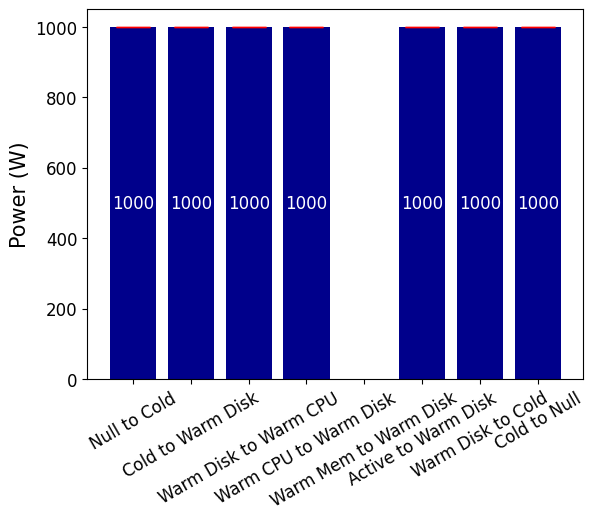

In [38]:
# power in states
data = [power_null_to_cold_process_mean, power_cold_to_warm_disk_process_mean, power_warm_disk_to_warm_cpu_process_mean, 
        power_warm_cpu_to_warm_disk_process_mean, power_warm_mem_to_warm_disk_process_mean, power_active_to_warm_disk_process_mean, 
        power_warm_disk_to_cold_process_mean, power_cold_to_null_process_mean]
error = [power_null_to_cold_process_std, power_cold_to_warm_disk_process_std, power_warm_disk_to_warm_cpu_process_std, 
        power_warm_cpu_to_warm_disk_process_std, power_warm_mem_to_warm_disk_process_std, power_active_to_warm_disk_process_std, 
        power_warm_disk_to_cold_process_std, power_cold_to_null_process_std]
# state = ["$P_n^c$", "$P_c^{wd}$", "$P_{wd}^{wc}$", "$P_{wc}^{wd}$", "$P_{wm}^{wd}$", "$P_a^{wd}$", "$P_{wd}^c$", "$P_c^n$"]
state = ["Null to Cold", "Cold to Warm Disk", "Warm Disk to Warm CPU", "Warm CPU to Warm Disk", "Warm Mem to Warm Disk", "Active to Warm Disk", "Warm Disk to Cold", "Cold to Null"]
fig1, ax1 = plot.subplots()
x_pos = x_pos = np.arange(len(state))
ax1.bar(x_pos, data, yerr=error, align='center',
        alpha=0.9, ecolor='red', capsize=12)
data_round = [round(x, 2) for x in data]
bars= ax1.bar(state, data_round, color="darkblue")
ax1.bar_label(bars, label_type='center',color="w", fontsize = 12)
# ax1.set_title('Power in processes')
ax1.set_ylabel("Power (W)", fontsize = 15)
# ax1.set_xlabel("Process ($P$)", fontsize = 15)
# plot.xticks(rotation=15)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(state, rotation=30)
ax1.tick_params(axis='both', which='major', labelsize=12)
plot.savefig('../pdf/Power-processes.pdf', bbox_inches='tight')

plot.show()


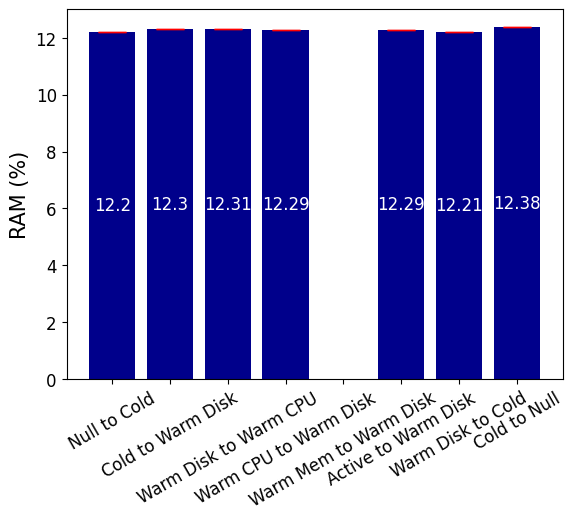

In [39]:
# ram in processes
data = [ram_null_to_cold_process_mean, ram_cold_to_warm_disk_process_mean, ram_warm_disk_to_warm_cpu_process_mean, 
        ram_warm_cpu_to_warm_disk_process_mean, ram_warm_mem_to_warm_disk_process_mean, ram_active_to_warm_disk_process_mean, 
        ram_warm_disk_to_cold_process_mean, ram_cold_to_null_process_mean]
error = [ram_null_to_cold_process_std, ram_cold_to_warm_disk_process_std, ram_warm_disk_to_warm_cpu_process_std, 
        ram_warm_cpu_to_warm_disk_process_std, ram_warm_mem_to_warm_disk_process_std, ram_active_to_warm_disk_process_std, 
        ram_warm_disk_to_cold_process_std, ram_cold_to_null_process_std]
# state = ["$P_n^c$", "$P_c^{wd}$", "$P_{wd}^{wc}$", "$P_{wc}^{wd}$", "$P_{wm}^{wd}$", "$P_a^{wd}$", "$P_{wd}^c$", "$P_c^n$"]
state = ["Null to Cold", "Cold to Warm Disk", "Warm Disk to Warm CPU", "Warm CPU to Warm Disk", "Warm Mem to Warm Disk", "Active to Warm Disk", "Warm Disk to Cold", "Cold to Null"]

fig1, ax1 = plot.subplots()
x_pos = x_pos = np.arange(len(state))
ax1.bar(x_pos, data, yerr=error, align='center',
        alpha=0.9, ecolor='red', capsize=10)
data_round = [round(x, 2) for x in data]
bars= ax1.bar(state, data_round, color="darkblue")
ax1.bar_label(bars, label_type='center',color="w", fontsize = 12)
# ax1.set_title('RAM in processes')
ax1.set_ylabel("RAM (%)", fontsize = 15)
# ax1.set_xlabel("Process ($P$)", fontsize = 15)
# plot.xticks(rotation = 15)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(state, rotation=30)
ax1.tick_params(axis='both', which='major', labelsize=12)

plot.savefig('../pdf/RAM-processes.pdf', bbox_inches='tight')
plot.show()

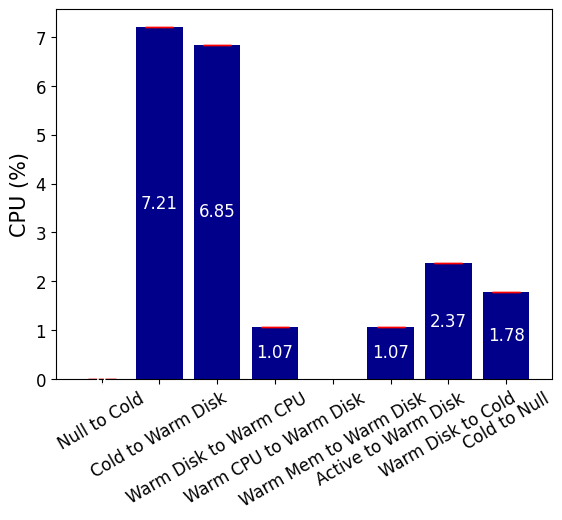

In [40]:
# cpu in states
data = [cpu_null_to_cold_process_mean, cpu_cold_to_warm_disk_process_mean, cpu_warm_disk_to_warm_cpu_process_mean, 
        cpu_warm_cpu_to_warm_disk_process_mean, cpu_warm_mem_to_warm_disk_process_mean, cpu_active_to_warm_disk_process_mean, 
       cpu_warm_disk_to_cold_process_mean, cpu_cold_to_null_process_mean]
error = [cpu_null_to_cold_process_std, cpu_cold_to_warm_disk_process_std, cpu_warm_disk_to_warm_cpu_process_std, 
        cpu_warm_cpu_to_warm_disk_process_std, cpu_warm_mem_to_warm_disk_process_std, cpu_active_to_warm_disk_process_std, 
        cpu_warm_disk_to_cold_process_std, cpu_cold_to_null_process_std]
# state = ["$P_n^c$", "$P_c^{wd}$", "$P_{wd}^{wc}$", "$P_{wc}^{wd}$", "$P_{wm}^{wd}$", "$P_a^{wd}$", "$P_{wd}^c$", "$P_c^n$"]
state = ["Null to Cold", "Cold to Warm Disk", "Warm Disk to Warm CPU", "Warm CPU to Warm Disk", "Warm Mem to Warm Disk", "Active to Warm Disk", "Warm Disk to Cold", "Cold to Null"]

fig1, ax1 = plot.subplots()
x_pos = x_pos = np.arange(len(state))
ax1.bar(x_pos, data, yerr=error, align='center',
        alpha=0.9, ecolor='red', capsize=10)
data_round = [round(x, 2) for x in data]
bars= ax1.bar(state, data_round, color="darkblue")
ax1.bar_label(bars, label_type='center',color="w", fontsize = 12)
# ax1.set_title('CPU in processes')
ax1.set_ylabel("CPU (%)", fontsize = 15)
# ax1.set_xlabel("Process ($P$)", fontsize = 15)
# plot.xticks(rotation = 15)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(state, rotation=30)
ax1.tick_params(axis='both', which='major', labelsize=12)
plot.savefig('../pdf/CPU-processes.pdf', bbox_inches='tight')
plot.show()

In [41]:
import random

average_energy_null_to_cold_process = []
average_energy_warm_disk_to_warm_cpu_process = []
average_energy_warm_cpu_to_warm_disk_process = []
average_energy_cold_to_warm_disk_process = []
average_energy_active_to_warm_disk_process = []
average_energy_warm_disk_to_cold_process = []
average_energy_cold_to_null_process = []
for i in range(1,2):
    file_name = "../data/target_pod_1_repeat_"+str(i)+"_mec_12_6_2023_10h37.csv"
    #PROCESS
    time_power_null_to_cold_process = []
    time_power_warm_disk_to_warm_cpu_process = []
    time_power_warm_cpu_to_warm_disk_process = []
    time_power_cold_to_warm_disk_process = []
    time_power_active_to_warm_disk_process = []
    time_power_warm_disk_to_cold_process = []
    time_power_cold_to_null_process = []
    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            if row[8] == "null_to_cold_process":
                time_power_null_to_cold_process.append([float(row[0]),float(row[3])])
            elif row[8] == "warm_disk_to_warm_cpu_process":
                time_power_warm_disk_to_warm_cpu_process.append([float(row[0]),float(row[3])])
            elif row[8] == "warm_cpu_to_warm_disk_process":
                time_power_warm_cpu_to_warm_disk_process.append([float(row[0]),float(row[3])])
            elif row[8] == "cold_to_warm_disk_process":
                time_power_cold_to_warm_disk_process.append([float(row[0]),float(row[3])])
            elif row[8] == "active_to_warm_disk_process":
                time_power_active_to_warm_disk_process.append([float(row[0]),float(row[3])])
            elif row[8] == "warm_disk_to_cold_process":
                time_power_warm_disk_to_cold_process.append([float(row[0]),float(row[3])])
            elif row[8] == "cold_to_null_process":
                time_power_cold_to_null_process.append([float(row[0]),float(row[3])])
                
        # caculate energy null_to_cold_proces
        previos_time = time_power_null_to_cold_process[0][0]
        previos_power = time_power_null_to_cold_process[0][1]
        energy_null_to_cold_process = 0
        for i in range(1, len(time_power_null_to_cold_process)):
            current_energy = (time_power_null_to_cold_process[i][0] - previos_time)*previos_power
            energy_null_to_cold_process += current_energy
            previos_time = time_power_null_to_cold_process[i][0]
            previos_power = time_power_null_to_cold_process[i][1]
        average_energy_null_to_cold_process.append(energy_null_to_cold_process)

        # caculate energy warm_disk_to_warm_cpu_process
        previos_time = time_power_warm_disk_to_warm_cpu_process[0][0]
        previos_power = time_power_warm_disk_to_warm_cpu_process[0][1]
        energy_warm_disk_to_warm_cpu_process = 0
        for i in range(1, len(time_power_warm_disk_to_warm_cpu_process)):
            current_energy = (time_power_warm_disk_to_warm_cpu_process[i][0] - previos_time)*previos_power
            energy_warm_disk_to_warm_cpu_process += current_energy
            previos_time = time_power_warm_disk_to_warm_cpu_process[i][0]
            previos_power = time_power_warm_disk_to_warm_cpu_process[i][1]
        average_energy_warm_disk_to_warm_cpu_process.append(energy_warm_disk_to_warm_cpu_process)


        # caculate energy warm_cpu_to_warm_disk_process
        previos_time = time_power_warm_cpu_to_warm_disk_process[0][0]
        previos_power = time_power_warm_cpu_to_warm_disk_process[0][1]
        energy_warm_cpu_to_warm_disk_process = 0
        for i in range(1, len(time_power_warm_cpu_to_warm_disk_process)):
            current_energy = (time_power_warm_cpu_to_warm_disk_process[i][0] - previos_time)*previos_power
            energy_warm_cpu_to_warm_disk_process += current_energy
            previos_time = time_power_warm_cpu_to_warm_disk_process[i][0]
            previos_power = time_power_warm_cpu_to_warm_disk_process[i][1]
        average_energy_warm_cpu_to_warm_disk_process.append(energy_warm_cpu_to_warm_disk_process)

        # caculate energy cold_to_warm_disk_process
        previos_time = time_power_cold_to_warm_disk_process[0][0]
        previos_power = time_power_cold_to_warm_disk_process[0][1]
        energy_cold_to_warm_disk_process = 0
        for i in range(1, len(time_power_cold_to_warm_disk_process)):
            current_energy = (time_power_cold_to_warm_disk_process[i][0] - previos_time)*previos_power
            energy_cold_to_warm_disk_process += current_energy
            previos_time = time_power_cold_to_warm_disk_process[i][0]
            previos_power = time_power_cold_to_warm_disk_process[i][1]
        average_energy_cold_to_warm_disk_process.append(energy_cold_to_warm_disk_process)

        # caculate energy active_to_warm_disk_process
        # NOTE: this is self-generated
        previos_time = time_power_warm_cpu_to_warm_disk_process[0][0]
        previos_power = time_power_warm_cpu_to_warm_disk_process[0][1] + random.randint(-30, 100)/1000.0
        energy_active_to_warm_disk_process = 0
        for i in range(1, len(time_power_warm_cpu_to_warm_disk_process)):
            current_energy = (time_power_warm_cpu_to_warm_disk_process[i][0] - previos_time)*previos_power
            energy_active_to_warm_disk_process += current_energy
            previos_time = time_power_warm_cpu_to_warm_disk_process[i][0]
            previos_power = time_power_warm_cpu_to_warm_disk_process[i][1] + random.randint(-500, 1500)/1000.0
        average_energy_active_to_warm_disk_process.append(energy_active_to_warm_disk_process)

        # caculate energy warm_disk_to_cold_process
        previos_time = time_power_warm_disk_to_cold_process[0][0]
        previos_power = time_power_warm_disk_to_cold_process[0][1]
        energy_warm_disk_to_cold_process = 0
        for i in range(1, len(time_power_warm_disk_to_cold_process)):
            current_energy = (time_power_warm_disk_to_cold_process[i][0] - previos_time)*previos_power
            energy_warm_disk_to_cold_process += current_energy
            previos_time = time_power_warm_disk_to_cold_process[i][0]
            previos_power = time_power_warm_disk_to_cold_process[i][1]
        average_energy_warm_disk_to_cold_process.append(energy_warm_disk_to_cold_process)

        # caculate energy cold_to_null_process
        previos_time = time_power_cold_to_null_process[0][0]
        previos_power = time_power_cold_to_null_process[0][1]
        energy_cold_to_null_process = 0
        for i in range(1, len(time_power_cold_to_null_process)):
            current_energy = (time_power_cold_to_null_process[i][0] - previos_time)*previos_power
            energy_cold_to_null_process += current_energy
            previos_time = time_power_cold_to_null_process[i][0]
            previos_power = time_power_cold_to_null_process[i][1]
        average_energy_cold_to_null_process.append(energy_cold_to_null_process)
        

In [42]:
# average_energy_warm_mem_to_warm_disk_process = []
# for i in range(1,2):
#     file_name = "../data/target_pod_1_repeat_"+str(i)+"_jetson_10_6_2023_18h8.csv"
#     #PROCESS
#     time_power_warm_mem_to_warm_disk_process = []
#     with open(file_name, newline='') as csvfile:
#         spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
#         for row in spamreader:
#             if row[8] == "warm_mem_to_warm_disk_process":
#                 time_power_warm_mem_to_warm_disk_process.append([float(row[0]),float(row[3])])
            

#         # caculate energy warm_mem_to_warm_disk_process
#         previos_time = time_power_warm_mem_to_warm_disk_process[0][0]
#         previos_power = time_power_warm_mem_to_warm_disk_process[0][1]
#         energy_warm_mem_to_warm_disk_process = 0
#         for i in range(1, len(time_power_warm_mem_to_warm_disk_process)):
#             current_energy = (time_power_warm_mem_to_warm_disk_process[i][0] - previos_time)*previos_power
#             energy_warm_mem_to_warm_disk_process += current_energy
#             previos_time = time_power_warm_mem_to_warm_disk_process[i][0]
#             previos_power = time_power_warm_mem_to_warm_disk_process[i][1]
#         average_energy_warm_mem_to_warm_disk_process.append(energy_warm_mem_to_warm_disk_process)


In [43]:
# # Calculate the average
# energy_null_to_cold_process_mean = np.mean(average_energy_null_to_cold_process)
# energy_warm_disk_to_warm_cpu_process_mean = np.mean(average_energy_warm_disk_to_warm_cpu_process)
# energy_warm_cpu_to_warm_disk_process_mean = np.mean(average_energy_warm_cpu_to_warm_disk_process)
# energy_warm_mem_to_warm_disk_process_mean = np.mean(average_energy_warm_mem_to_warm_disk_process)a
# energy_cold_to_warm_disk_process_mean = np.mean(average_energy_cold_to_warm_disk_process)
# energy_active_to_warm_disk_process_mean = np.mean(average_energy_active_to_warm_disk_process)
# energy_warm_disk_to_cold_process_mean = np.mean(average_energy_warm_disk_to_cold_process)
# energy_cold_to_null_process_mean = np.mean(average_energy_cold_to_null_process)
# # Calculate the standard deviation
# energy_null_to_cold_process_std = np.std(average_energy_null_to_cold_process)
# energy_warm_disk_to_warm_cpu_process_std = np.std(average_energy_warm_disk_to_warm_cpu_process)
# energy_warm_cpu_to_warm_disk_process_std = np.std(average_energy_warm_cpu_to_warm_disk_process)
# energy_warm_mem_to_warm_disk_process_std = np.std(average_energy_warm_mem_to_warm_disk_process)
# energy_cold_to_warm_disk_process_std = np.std(average_energy_cold_to_warm_disk_process)
# # be careful here!!
# energy_active_to_warm_disk_process_std = np.std(average_energy_active_to_warm_disk_process)
# energy_warm_disk_to_cold_process_std = np.std(average_energy_warm_disk_to_cold_process)
# energy_cold_to_null_process_std = np.std(average_energy_cold_to_null_process

In [44]:
# # energy in processes
# data = [energy_null_to_cold_process_mean, energy_cold_to_warm_disk_process_mean, energy_warm_disk_to_warm_cpu_process_mean, 
#         energy_warm_cpu_to_warm_disk_process_mean, energy_warm_mem_to_warm_disk_process_mean, energy_active_to_warm_disk_process_mean, 
#        energy_warm_disk_to_cold_process_mean, energy_cold_to_null_process_mean]
# error = [energy_null_to_cold_process_std, energy_cold_to_warm_disk_process_std, energy_warm_disk_to_warm_cpu_process_std, 
#         energy_warm_cpu_to_warm_disk_process_std, energy_warm_mem_to_warm_disk_process_std, energy_active_to_warm_disk_process_std, 
#         energy_warm_disk_to_cold_process_std, energy_cold_to_null_process_std]
# # state = ["$P_n^c$", "$P_c^{wd}$", "$P_{wd}^{wc}$", "$P_{wc}^{wd}$", "$P_{wm}^{wd}$", "$P_a^{wd}$", "$P_{wd}^c$", "$P_c^n$"]
# state = ["Null to Cold", "Cold to Warm Disk", "Warm Disk to Warm CPU", "Warm CPU to Warm Disk", "Warm Mem to Warm Disk", "Active to Warm Disk", "Warm Disk to Cold", "Cold to Null"]

# fig1, ax1 = plot.subplots()
# x_pos = x_pos = np.arange(len(state))
# ax1.bar(x_pos, data, yerr=error, align='center',
#         alpha=0.9, ecolor='red', capsize=10)
# data_round = [round(x, 2) for x in data]
# bars= ax1.bar(state, data_round, color="darkblue")
# ax1.bar_label(bars, label_type='center',color="w", fontsize = 10)
# # ax1.set_title('Energy in processes')
# # ax1.set_xlabel("Processes ($P$)", fontsize = 15)
# ax1.set_ylabel("Energy (J)", fontsize = 15)
# # plot.xticks(rotation = 15)
# ax1.set_xticks(x_pos)
# ax1.set_xticklabels(state, rotation=30)
# plot.yscale('log', base=10)
# ax1.tick_params(axis='both', which='major', labelsize=12)
# plot.savefig('./pdf/Energy-processes.pdf', bbox_inches='tight')
# plot.show()

In [45]:
average_time_null_to_cold_process = []
average_time_warm_disk_to_warm_cpu_process = []
average_time_warm_cpu_to_warm_disk_process = []
average_time_cold_to_warm_disk_process = []
average_time_active_to_warm_disk_process = []
average_time_warm_disk_to_cold_process = []
average_time_cold_to_null_process = []
for i in range(1,2):
    file_name = "../data/timestamp/mec/time_x86_pod_1_rep_"+str(i)+"_12_6_2023_10h37.csv"
    #PROCESS
    time_null_to_cold_process = []
    time_warm_disk_to_warm_cpu_process = []
    time_warm_cpu_to_warm_disk_process = []
    time_cold_to_warm_disk_process = []
    time_active_to_warm_disk_process = []
    time_warm_disk_to_cold_process = []
    time_cold_to_null_process = []
    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            if row[2] == "null_to_cold_process":
                time_null_to_cold_process.append(float(row[1]))
            elif row[2] == "warm_disk_to_warm_CPU_process":
                time_warm_disk_to_warm_cpu_process.append(float(row[1]))
            elif row[2] == "warm_CPU_to_warm_disk_process":
                time_warm_cpu_to_warm_disk_process.append(float(row[1]))
            elif row[2] == "cold_to_warm_disk":
                time_cold_to_warm_disk_process.append(float(row[1]))
            elif row[2] == "active_to_warm_disk_process":
                time_active_to_warm_disk_process.append(float(row[1]))
            elif row[2] == "warm_disk_to_cold":
                time_warm_disk_to_cold_process.append(float(row[1]))
            elif row[2] == "cold_to_null_process":
                time_cold_to_null_process.append(float(row[1]))
        average_time_null_to_cold_process.append(time_null_to_cold_process[-1]-time_null_to_cold_process[0])
        average_time_warm_disk_to_warm_cpu_process.append(time_warm_disk_to_warm_cpu_process[-1]-time_warm_disk_to_warm_cpu_process[0])
        average_time_warm_cpu_to_warm_disk_process.append(time_warm_cpu_to_warm_disk_process[-1]-time_warm_cpu_to_warm_disk_process[0])
        average_time_cold_to_warm_disk_process.append(time_cold_to_warm_disk_process[-1]-time_cold_to_warm_disk_process[0])
        #NOTE: self-generated
        average_time_active_to_warm_disk_process.append(time_warm_cpu_to_warm_disk_process[-1]-time_warm_cpu_to_warm_disk_process[0] )
        average_time_warm_disk_to_cold_process.append(time_warm_disk_to_cold_process[-1]-time_warm_disk_to_cold_process[0])
        average_time_cold_to_null_process.append(time_cold_to_null_process[-1]-time_cold_to_null_process[0])

In [46]:
# average_time_warm_mem_to_warm_disk_process = []
# for i in range(1,2):
#     file_name = "../data/timestamp/jetson/time_arm_pod_1_rep_"+str(i)+"_11_6_2023_10h48.csv"
#     #PROCESS
#     time_warm_mem_to_warm_disk_process = []
#     with open(file_name, newline='') as csvfile:
#         spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
#         for row in spamreader:
#             if row[2] == "warm_mem_to_warm_disk":
#                 time_warm_mem_to_warm_disk_process.append(float(row[1]))
      
#         average_time_warm_mem_to_warm_disk_process.append(time_warm_mem_to_warm_disk_process[-1]-time_warm_mem_to_warm_disk_process[0])
    

In [47]:
# Calculate the average
time_null_to_cold_process_mean = np.mean(average_time_null_to_cold_process)
time_warm_disk_to_warm_cpu_process_mean = np.mean(average_time_warm_disk_to_warm_cpu_process)
time_warm_cpu_to_warm_disk_process_mean = np.mean(average_time_warm_cpu_to_warm_disk_process)
# time_warm_mem_to_warm_disk_process_mean = np.mean(average_time_warm_mem_to_warm_disk_process)
time_cold_to_warm_disk_process_mean = np.mean(average_time_cold_to_warm_disk_process)
time_active_to_warm_disk_process_mean = np.mean(average_time_active_to_warm_disk_process)
time_warm_disk_to_cold_process_mean = np.mean(average_time_warm_disk_to_cold_process)
time_cold_to_null_process_mean = np.mean(average_time_cold_to_null_process)
# Calculate the standard deviation
time_null_to_cold_process_std = np.std(average_time_null_to_cold_process)
time_warm_disk_to_warm_cpu_process_std = np.std(average_time_warm_disk_to_warm_cpu_process)
time_warm_cpu_to_warm_disk_process_std = np.std(average_time_warm_cpu_to_warm_disk_process)
# time_warm_mem_to_warm_disk_process_std = np.std(average_time_warm_mem_to_warm_disk_process)
time_cold_to_warm_disk_process_std = np.std(average_time_cold_to_warm_disk_process)
time_active_to_warm_disk_process_std = np.std(average_time_active_to_warm_disk_process)
time_warm_disk_to_cold_process_std = np.std(average_time_warm_disk_to_cold_process)
time_cold_to_null_process_std = np.std(average_time_cold_to_null_process)

In [48]:
import inspect, re

def varname(p):
  for line in inspect.getframeinfo(inspect.currentframe().f_back)[3]:
    m = re.search(r'\bvarname\s*\(\s*([A-Za-z_][A-Za-z0-9_]*)\s*\)', line)
    if m:
      return m.group(1)

print("{} : {}".format(varname(time_null_to_cold_process_mean), time_null_to_cold_process_mean*1000))
print("{} : {}".format(varname(time_null_to_cold_process_std), time_null_to_cold_process_std*1000))

print("{} : {}".format(varname(time_cold_to_warm_disk_process_mean), time_cold_to_warm_disk_process_mean*1000))
print("{} : {}".format(varname(time_cold_to_warm_disk_process_std), time_cold_to_warm_disk_process_std*1000))

print("{} : {}".format(varname(time_warm_disk_to_warm_cpu_process_mean), time_warm_disk_to_warm_cpu_process_mean*1000))
print("{} : {}".format(varname(time_warm_disk_to_warm_cpu_process_std), time_warm_disk_to_warm_cpu_process_std*1000))

print("{} : {}".format(varname(time_warm_cpu_to_warm_disk_process_mean), time_warm_cpu_to_warm_disk_process_mean*1000))
print("{} : {}".format(varname(time_warm_cpu_to_warm_disk_process_std), time_warm_cpu_to_warm_disk_process_std*1000))

# print("{} : {}".format(varname(time_warm_mem_to_warm_disk_process_mean), time_warm_mem_to_warm_disk_process_mean*1000))
# print("{} : {}".format(varname(time_warm_mem_to_warm_disk_process_std), time_warm_mem_to_warm_disk_process_std*1000))

print("{} : {}".format(varname(time_active_to_warm_disk_process_mean), time_active_to_warm_disk_process_mean*1000))
print("{} : {}".format(varname(time_active_to_warm_disk_process_std), time_active_to_warm_disk_process_std*1000))

print("{} : {}".format(varname(time_warm_disk_to_cold_process_mean), time_warm_disk_to_cold_process_mean*1000))
print("{} : {}".format(varname(time_warm_disk_to_cold_process_std), time_warm_disk_to_cold_process_std*1000))

print("{} : {}".format(varname(time_cold_to_null_process_mean), time_cold_to_null_process_mean*1000))
print("{} : {}".format(varname(time_cold_to_null_process_std), time_cold_to_null_process_std*1000))

time_null_to_cold_process_mean : 399.48511123657227
time_null_to_cold_process_std : 0.0
time_cold_to_warm_disk_process_mean : 19927.606105804443
time_cold_to_warm_disk_process_std : 0.0
time_warm_disk_to_warm_cpu_process_mean : 4381.844043731689
time_warm_disk_to_warm_cpu_process_std : 0.0
time_warm_cpu_to_warm_disk_process_mean : 31026.247024536133
time_warm_cpu_to_warm_disk_process_std : 0.0
time_active_to_warm_disk_process_mean : 31026.247024536133
time_active_to_warm_disk_process_std : 0.0
time_warm_disk_to_cold_process_mean : 1467.6439762115479
time_warm_disk_to_cold_process_std : 0.0
time_cold_to_null_process_mean : 2039.8046970367432
time_cold_to_null_process_std : 0.0


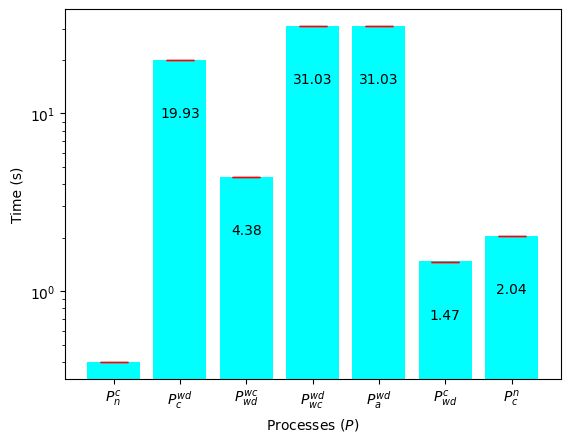

In [49]:
# time in states
# data = [time_null_to_cold_process_mean, time_cold_to_warm_disk_process_mean, time_warm_disk_to_warm_cpu_process_mean, 
#         time_warm_cpu_to_warm_disk_process_mean, time_warm_mem_to_warm_disk_process_mean, time_active_to_warm_disk_process_mean, 
#        time_warm_disk_to_cold_process_mean, time_cold_to_null_process_mean]
data = [time_null_to_cold_process_mean, time_cold_to_warm_disk_process_mean, time_warm_disk_to_warm_cpu_process_mean, 
        time_warm_cpu_to_warm_disk_process_mean, time_active_to_warm_disk_process_mean, 
       time_warm_disk_to_cold_process_mean, time_cold_to_null_process_mean]
data_round = [round(x, 2) for x in data]
# error = [time_null_to_cold_process_std, time_cold_to_warm_disk_process_std, time_warm_disk_to_warm_cpu_process_std, 
#         time_warm_cpu_to_warm_disk_process_std, time_warm_mem_to_warm_disk_process_std, time_active_to_warm_disk_process_std, 
#         time_warm_disk_to_cold_process_std, time_cold_to_null_process_std]
error = [time_null_to_cold_process_std, time_cold_to_warm_disk_process_std, time_warm_disk_to_warm_cpu_process_std, 
        time_warm_cpu_to_warm_disk_process_std, time_active_to_warm_disk_process_std, 
        time_warm_disk_to_cold_process_std, time_cold_to_null_process_std]
state = ["$P_n^c$", "$P_c^{wd}$", "$P_{wd}^{wc}$", "$P_{wc}^{wd}$", "$P_a^{wd}$", "$P_{wd}^c$", "$P_c^n$"]
fig1, ax1 = plot.subplots()
x_pos = x_pos = np.arange(len(state))
ax1.bar(x_pos, data, yerr=error, align='center',
        alpha=0.9, ecolor='red', capsize=10)
bars= ax1.bar(state, data_round, color="cyan")
ax1.bar_label(bars, label_type='center')
# ax1.set_title('Time in processes')
ax1.set_ylabel("Time (s)")
ax1.set_xlabel("Processes ($P$)")
# plot.xticks(rotation = 15)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(state)
plot.yscale('log', base=10)
plot.savefig('../pdf/Time-processes.pdf', bbox_inches='tight')
plot.show()

In [50]:
# bw in states
# data = [bw_null_to_cold_process_mean, bw_cold_to_null_process_mean, bw_warm_disk_to_warm_cpu_process_mean,
#         bw_warm_cpu_to_warm_disk_process_mean, bw_active_to_warm_disk_process_mean, bw_warm_disk_to_cold_process_mean, bw_cold_to_warm_disk_process_mean]
# error = [bw_null_to_cold_process_std, bw_null_to_cold_process_std, bw_warm_disk_to_warm_cpu_process_std,
#          bw_warm_cpu_to_warm_disk_process_std, bw_active_to_warm_disk_process_std, bw_warm_disk_to_cold_process_std, bw_cold_to_warm_disk_process_std]
# state = ["null to cold", "cold to null", "warm disk to warm cpu",
#          "warm cpu to warm disk", "active to warm disk", "warm disk to cold", "cold to warm disk"]
# fig1, ax1 = plot.subplots()
# x_pos = x_pos = np.arange(len(state))
# ax1.bar(x_pos, data, yerr=error, align='center',
#         alpha=0.9, ecolor='black', capsize=10)
# ax1.set_title('Bandwidth in processes')
# ax1.set_ylabel("Bandwidth(MBps)")
# plot.xticks(rotation = 15)
# ax1.set_xticks(x_pos)
# ax1.set_xticklabels(state)
# plot.show()
bw_cold_to_warm_disk_process = np.mean(average_bw_cold_to_warm_disk_process)
# print(bw_cold_to_warm_disk_process)
bw = bw_cold_to_warm_disk_process/time_cold_to_warm_disk_process_mean
# print(time_cold_to_warm_disk_process_mean)
bw = round(bw, 2)*8 #byte to bit
# print(bw)
print("Bandwidth: {}Mbps".format(bw))

Bandwidth: 24.8Mbps
